In [19]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KernelDensity
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
# Download and load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


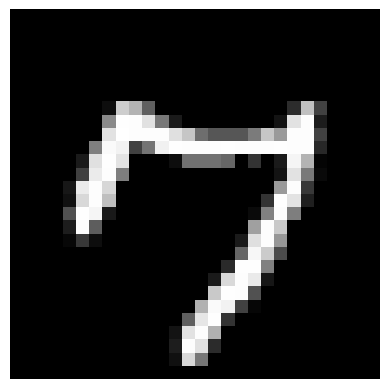

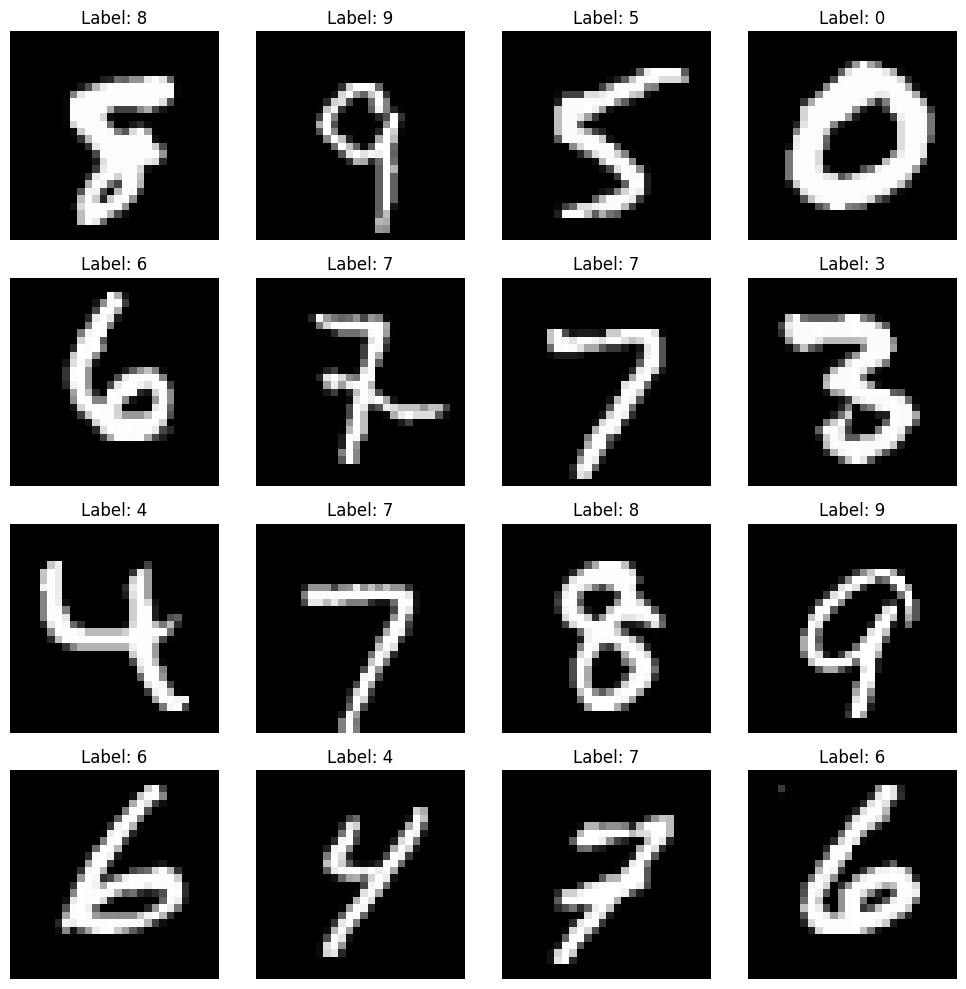

In [6]:
import matplotlib.pyplot as plt
import random

# function to display a single image
def display_image(img):
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

# function to display multiple images
def display_images(images, labels):
    nrows = ncols = int(np.ceil(np.sqrt(len(images))))
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10), squeeze=False)

    for i, (img, label) in enumerate(zip(images, labels)):
        row, col = i // ncols, i % ncols
        axes[row, col].imshow(img.reshape(28, 28), cmap='gray')
        axes[row, col].set_title(f"Label: {label}")
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Display a random image from the dataset
idx = random.randint(0, len(X))
display_image(X.values[idx])

# Display multiple random images from the dataset
random_indices = random.sample(range(len(X)), 16)
random_images = [X.values[i] for i in random_indices]
random_labels = [y.values[i] for i in random_indices]
display_images(random_images, random_labels)

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Perform PCA projections
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_train)

In [9]:
X_train.shape

(56000, 784)

In [10]:
lda = LDA(n_components=9)
X_lda = lda.fit_transform(X_train, y_train)

In [11]:
X_lda.shape

(56000, 9)

In [12]:
X_lda[:5]

array([[-1.19377185, -0.37524327,  0.92766113, -0.72429669, -0.94693981,
        -2.09872846,  0.33004146, -0.38011872,  0.22777996],
       [ 1.90030332, -1.01011004,  2.09828536, -1.63515638,  0.14103558,
         1.1190239 , -0.85591459, -1.49845063,  0.34143795],
       [ 0.55981778,  1.53220791,  0.45926625, -2.28423427,  0.63797989,
        -0.30366954, -1.14720886, -0.72162528, -0.1797795 ],
       [-3.56491125, -2.24752039, -2.14098977,  0.48511888,  1.2933954 ,
         0.73220372,  0.60417452,  0.18700481,  0.23214489],
       [ 0.75709367,  0.47854859,  1.0026886 ,  3.10658876, -0.12189769,
         0.29551358, -0.76694346, -3.10463126,  0.59881666]])

In [13]:
# Bayesian Classifiers on PCA data
gnb_diag_pca = GaussianNB().fit(X_pca, y_train)
gnb_full_pca = GaussianNB(priors=None, var_smoothing=1e-9).fit(X_pca, y_train)


In [14]:
# Bayesian Classifiers on LDA data
gnb_diag_lda = GaussianNB().fit(X_lda, y_train)
gnb_full_lda = GaussianNB(priors=None, var_smoothing=1e-9).fit(X_lda, y_train)

In [17]:
# Evaluate and compare the models

print('Accuracy metric for both PCA and LDA is given below:')
print("Diagonal Covariance on PCA data:", accuracy_score(y_test, gnb_diag_pca.predict(pca.transform(X_test))))
print("Full Covariance on PCA data:", accuracy_score(y_test, gnb_full_pca.predict(pca.transform(X_test))))
print("Diagonal Covariance on LDA data:", accuracy_score(y_test, gnb_diag_lda.predict(lda.transform(X_test))))
print("Full Covariance on LDA data:", accuracy_score(y_test, gnb_full_lda.predict(lda.transform(X_test))))

Accuracy metric for both PCA and LDA is given below:
Diagonal Covariance on PCA data: 0.7648571428571429
Full Covariance on PCA data: 0.7648571428571429
Diagonal Covariance on LDA data: 0.8752857142857143
Full Covariance on LDA data: 0.8752857142857143


In [18]:
# prompt: f1 score for multiclass



# Calculate and print the F1 scores for each model
print('F1 score metric for both PCA and LDA is given below:')
print("Diagonal Covariance on PCA data:", f1_score(y_test, gnb_diag_pca.predict(pca.transform(X_test)), average='micro'))
print("Full Covariance on PCA data:", f1_score(y_test, gnb_full_pca.predict(pca.transform(X_test)), average='micro'))
print("Diagonal Covariance on LDA data:", f1_score(y_test, gnb_diag_lda.predict(lda.transform(X_test)), average='micro'))
print("Full Covariance on LDA data:", f1_score(y_test, gnb_full_lda.predict(lda.transform(X_test)), average='micro'))


F1 score metric for both PCA and LDA is given below:
Diagonal Covariance on PCA data: 0.7648571428571429
Full Covariance on PCA data: 0.7648571428571429
Diagonal Covariance on LDA data: 0.8752857142857143
Full Covariance on LDA data: 0.8752857142857143


In [ ]:



rf_param_grid = {'n_estimators': [100, 200, 500],
                 'max_depth': [3, 5, 7, None]}

xgb_param_grid = {'max_depth': [3, 5, 7, 9],
                  'learning_rate': [0.01, 0.1, 0.3]}

In [21]:
# Define the hyperparameter grids
k_range = [1, 3, 5, 7, 9, 11, 13]
k_param_grid = {'n_neighbors': k_range}


# kNN Classifier
knn_clf = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_clf, k_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_pca, y_train)
print(f"Best k for kNN on D1: {knn_grid.best_params_['n_neighbors']}")




Best k for kNN on D1: 5


In [29]:
def plot_accuracies(model_name, param_name, param_range, cv_results):
    train_scores = []
    test_scores = []
    n_splits = len([k for k in cv_results.keys() if 'split' in k])
    for i in range(n_splits):
        train_scores.append(1 - cv_results[f'split{i}_test_score'])
        test_scores.append(cv_results[f'split{i}_test_score'])

    train_scores = np.array(train_scores).mean(axis=0)
    test_scores = np.array(test_scores).mean(axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_scores, label='Training accuracy')
    plt.plot(param_range, test_scores, label='Test accuracy')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.show()

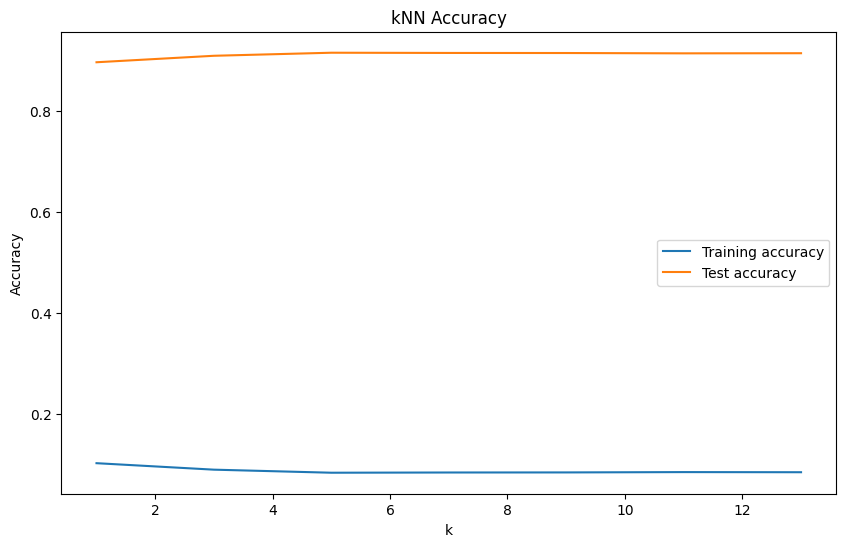

In [30]:
plot_accuracies('kNN', 'k', k_range, knn_grid.cv_results_)

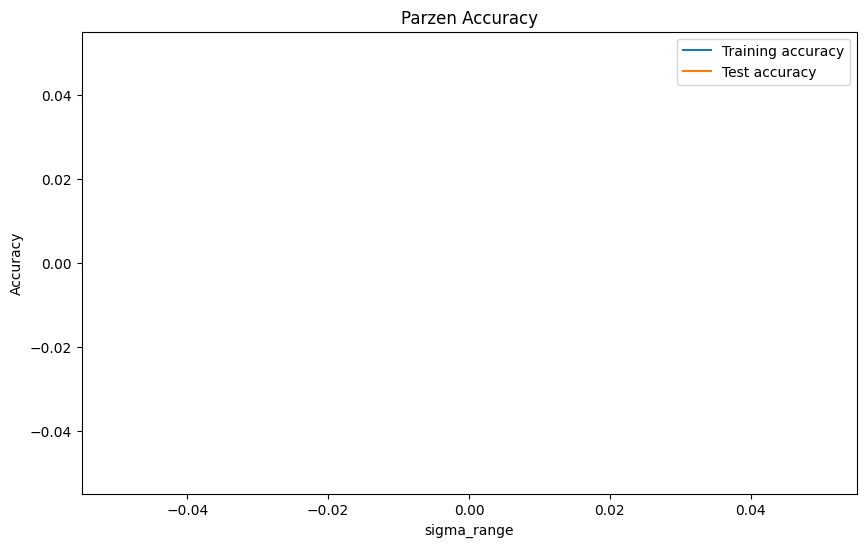

In [35]:
plot_accuracies('Parzen', 'sigma_range', sigma_range,parzen_grid.cv_results_)

In [36]:
parzen_grid.cv_results_

{'mean_fit_time': array([0.10222821, 0.10260692, 0.09703655, 0.10244393, 0.09801984]),
 'std_fit_time': array([0.0085457 , 0.00547806, 0.0019422 , 0.00890355, 0.00300775]),
 'mean_score_time': array([0.00086355, 0.00112648, 0.00054564, 0.00073557, 0.00061789]),
 'std_score_time': array([9.18829447e-05, 4.45239899e-04, 1.82315531e-04, 2.63459775e-04,
        3.48641359e-04]),
 'param_bandwidth': masked_array(data=[0.1, 0.5, 1.0, 2.0, 5.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'bandwidth': 0.1},
  {'bandwidth': 0.5},
  {'bandwidth': 1.0},
  {'bandwidth': 2.0},
  {'bandwidth': 5.0}],
 'split0_test_score': array([nan, nan, nan, nan, nan]),
 'split1_test_score': array([nan, nan, nan, nan, nan]),
 'split2_test_score': array([nan, nan, nan, nan, nan]),
 'split3_test_score': array([nan, nan, nan, nan, nan]),
 'split4_test_score': array([nan, nan, nan, nan, nan]),
 'mean_test_score': array([nan, nan, nan, nan, n

In [33]:
sigma_range = [0.1, 0.5, 1.0, 2.0, 5.0]
sigma_param_grid = {'bandwidth': sigma_range}
# Parzen Window Classifier
parzen_clf = KernelDensity()
parzen_grid = GridSearchCV(parzen_clf, sigma_param_grid, cv=5, scoring='accuracy')
parzen_grid.fit(X_pca, y_train)
print(f"Best sigma for Parzen on D1: {parzen_grid.best_params_['bandwidth']}")



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'KernelDensity' object has no attribute 'predict'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarni

Best sigma for Parzen on D1: 0.1


In [37]:
dt_param_grid = {'max_depth': [3, 5, 7, 9, None],
                 'min_samples_leaf': [1, 2, 4, 6, 8]}
# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt_clf, dt_param_grid, cv=5, scoring='accuracy')
dt_grid.fit(X_pca, y_train)
print(f"Best hyperparameters for Decision Tree on D1: {dt_grid.best_params_}")

Best hyperparameters for Decision Tree on D1: {'max_depth': None, 'min_samples_leaf': 6}


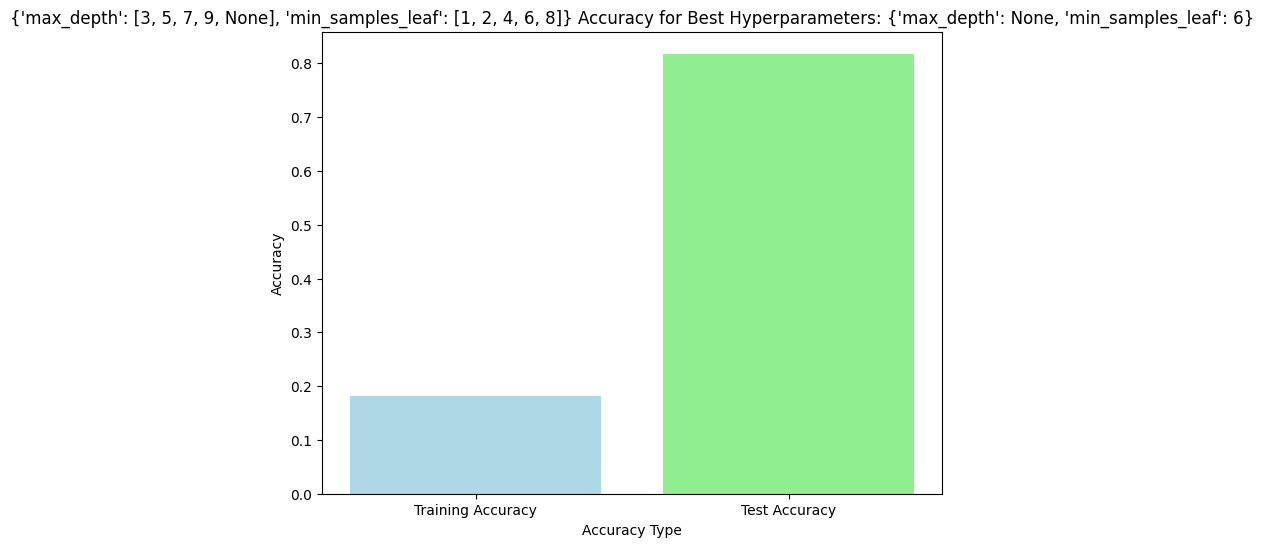

In [41]:
def plot_accuracies(model_name, cv_results):
    train_scores = []
    test_scores = []
    params = []
    n_splits = len([k for k in cv_results.keys() if 'split' in k])
    for i in range(n_splits):
        train_scores.append(1 - cv_results[f'split{i}_test_score'])
        test_scores.append(cv_results[f'split{i}_test_score'])

    train_scores = np.array(train_scores).mean(axis=0)
    test_scores = np.array(test_scores).mean(axis=0)

    best_index = np.argmax(test_scores)
    best_params = cv_results['params'][best_index]
    best_train_score = train_scores[best_index]
    best_test_score = test_scores[best_index]

    plt.figure(figsize=(8, 6))
    plt.bar(['Training Accuracy', 'Test Accuracy'], [best_train_score, best_test_score], color=['lightblue', 'lightgreen'])
    plt.title(f'{model_name} Accuracy for Best Hyperparameters: {best_params}')
    plt.xlabel('Accuracy Type')
    plt.ylabel('Accuracy')
    plt.show()
plot_accuracies( dt_param_grid, dt_grid.cv_results_)

In [ ]:
plot_accuracies('Parzen', 'sigma_range', sigma_range,parzen_grid.cv_results_)